# Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
Occupations

In [1]:
#Step 1 - Import the necessary libraries
import pandas as pd
 
#Step 2 - reading csv file
#Step 3 - Assign it to a variable called users
users = pd.read_csv("address.csv", sep = "|")


In [2]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [3]:
#Step 4 finding mean age per occupation
users.groupby("occupation")["age"].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least
gender_counts = users.groupby(['occupation', 'gender']).size()
total_counts = users.groupby('occupation').size()
male_counts = gender_counts.unstack()['M']  # Male counts
male_ratio = male_counts / total_counts

male_ratio = pd.DataFrame({
    'Occupation': male_ratio.index,
    'M Ratio': male_ratio.values
})

male_ratio.sort_values(by='M Ratio', ascending=False)




,Occupation,M Ratio
2,doctor,1.000000
4,engineer,0.970149
19,technician,0.962963
15,retired,0.928571
14,programmer,0.909091
6,executive,0.906250
17,scientist,0.903226
5,entertainment,0.888889
9,lawyer,0.833333
16,salesman,0.750000


In [5]:
#Step 6. For each occupation, calculate the minimum and maximum ages
users.groupby("occupation")["age"].agg(["min","max"])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [6]:
#Step 7. For each combination of occupation and sex, calculate the mean age
users.groupby(["occupation","gender"])["age"].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [7]:
#Step 8. For each occupation present the percentage of women and men
users.value_counts(subset=['occupation', 'gender'],normalize=True).mul(100).round(1).astype(str) + '%'

occupation     gender
student        M         14.4%
educator       M          7.3%
other          M          7.3%
engineer       M          6.9%
student        F          6.4%
programmer     M          6.4%
administrator  M          4.6%
               F          3.8%
other          F          3.8%
librarian      F          3.1%
executive      M          3.1%
scientist      M          3.0%
technician     M          2.8%
writer         M          2.8%
educator       F          2.8%
librarian      M          2.3%
writer         F          2.0%
marketing      M          1.7%
entertainment  M          1.7%
artist         M          1.6%
retired        M          1.4%
artist         F          1.4%
healthcare     F          1.2%
lawyer         M          1.1%
marketing      F          1.1%
salesman       M          1.0%
doctor         M          0.7%
programmer     F          0.6%
homemaker      F          0.6%
none           M          0.5%
healthcare     M          0.5%
none           F 

# Question 2
Euro Teams

In [8]:
#Step 1. Import the necessary libraries
import pandas as pd2

#Step 2. Import the dataset
#Step 3. Assign it to a variable called euro12
euro12 = pd2.read_csv("teams.csv", sep = ",")

In [9]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [10]:
#Step 4. Select only the Goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [11]:
#Step 5. How many team participated in the Euro2012?
euro12.shape[0]

16

In [12]:
#Step 6. What is the number of columns in the dataset?
euro12.shape[1]

35

In [13]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12.loc[:,['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [14]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [15]:
#Step 9. Calculate the mean Yellow Cards given per Team
euro12.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [16]:
#Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [17]:
#11. Select the teams that start with G
euro12[euro12['Team'].str.startswith("G")]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [18]:
#Step 12. Select the first 7 columns
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [19]:
#Step 13. Select all columns except the last 3
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [20]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
filter_criteria = (euro12['Team'].isin(['England','Italy','Russia']))
euro12.loc[filter_criteria,['Team','Shooting Accuracy']]



,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3
Housing

In [21]:
#Step 1. Import the necessary libraries
import numpy as np
import pandas as pd

#Step 2. Create 3 differents Series, each of length 100, as follows:
#The first a random number from 1 to 4
data1 = pd.Series(np.random.randint(1, 4, size=100))

#The second a random number from 1 to 3
data2 = pd.Series(np.random.randint(1, 3, size=100))

#The third a random number from 10,000 to 30,000
data3 = pd.Series(np.random.randint(10000, 30000, size=100))

In [22]:
#Step 3. Create a DataFrame by joinning the Series by column
df = pd.concat([data1,data2,data3], axis=1)
df


,0,1,2
0,1,1,23074
1,2,2,17651
2,3,2,20953
3,3,1,26857
4,3,2,16959
...,...,...,...
95,1,1,21276
96,1,2,28043
97,3,2,14089
98,1,2,13306


In [23]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs','bathrs','price_sqr_meter']
df.head()

,bedrs,bathrs,price_sqr_meter
0,1,1,23074
1,2,2,17651
2,3,2,20953
3,3,1,26857
4,3,2,16959


In [24]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([data1,data2,data3],axis=0)
bigcolumn

0         1
1         2
2         3
3         3
4         3
      ...  
95    21276
96    28043
97    14089
98    13306
99    26153
Length: 300, dtype: int32

In [25]:
#Step 6. Ops it seems it is going only until index 99. Is it true?
bigcolumn

0         1
1         2
2         3
3         3
4         3
      ...  
95    21276
96    28043
97    14089
98    13306
99    26153
Length: 300, dtype: int32

In [26]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          1
1          2
2          3
3          3
4          3
       ...  
295    21276
296    28043
297    14089
298    13306
299    26153
Length: 300, dtype: int32

# Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

In [27]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import datetime as dt

In [28]:
#Step 2. Import the dataset from the attached file wind.txt
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data = pd.read_csv('wind.txt', delimiter='\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [29]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
data.rename(columns={'Yr':'Year','Mo':"Month","Dy":"Day"}, inplace=True)

data['Year'] += 1900

In [30]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data.index = pd.to_datetime(pd.concat([data['Year'], data['Month'], data['Day']], axis=1))
data.drop(['Year','Month','Day'], axis=1, inplace=True)

In [31]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().values.ravel().sum()

31

In [32]:
#Step 7. Compute how many non-missing values there are in total.
count = data.count()
print("Result:",count.sum())

Result: 78857


In [33]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
calcMean = data.mean()
calcMean.mean()

10.227982360836938

In [34]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
loc_stats = pd.DataFrame()
loc_stats['min:'] = data.min()
loc_stats['max:'] = data.max()
loc_stats['mean:'] = data.mean()
loc_stats['std:'] = data.std()
loc_stats

,min:,max:,mean:,std:
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [35]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
day_stats = pd.DataFrame()
day_stats['min:'] = data.min(axis=1)
day_stats['max:'] = data.max(axis=1)
day_stats['mean:'] = data.mean(axis=1)
day_stats['std:'] = data.std(axis=1)
day_stats

,min:,max:,mean:,std:
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836
1978-12-30,9.13,28.79,15.367500,5.540437


In [36]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
jan = data[data.index.month == 1]
jan.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [37]:
#Step 12. Downsample the record to a yearly frequency for each location.
yearFreq = data.resample('Y').mean()
yearFreq

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904
1970-12-31,12.600329,10.726932,11.730247,6.217178,10.567370,7.609452,9.609890,8.334630,9.297616,8.289808,13.183644,16.456027


In [38]:
#Step 13. Downsample the record to a monthly frequency for each location.
monthFreq = data.resample('M').mean()
monthFreq

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000
1978-11-30,16.151667,14.802667,13.508000,7.317333,11.475000,8.743000,11.492333,9.657333,10.701333,10.676000,17.404667,20.723000


# Question 5

In [39]:
#Step 1. Import the necessary libraries
import pandas as pd


In [40]:
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [41]:
#Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [42]:
#Step 5. What is the number of observations in the dataset?
chipo.shape[0]

4622

In [43]:
#Step 6. What is the number of columns in the dataset?
chipo.shape[1]

5

In [44]:
#Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [45]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [46]:
#Step 9. Which was the most-ordered item?
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [47]:
#Step 10. For the most-ordered item, how many items were ordered?
chipo.item_name.unique().shape[0]

50

In [48]:
#Step 11. What was the most ordered item in the choice_description column?
chipo.choice_description.value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

In [49]:
#Step 12. How many items were orderd in total?
chipo.quantity.sum()

4972

In [68]:
#Step 13.
#• Turn the item price into a float
#• Check the item price type
#• Create a lambda function and change the type of item price
#• Check the item price type

def item_float(x):
    return float(x[1:-1])
chipo.item_price = chipo.item_price.apply(item_float)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [51]:
#Step 14. How much was the revenue for the period in the dataset?
chipo.item_price.sum()

'$2.39 $3.39 $3.39 $2.39 $16.98 $10.98 $1.69 $11.75 $9.25 $9.25 $4.45 $8.75 $8.75 $11.25 $4.45 $2.39 $8.49 $8.49 $2.18 $8.75 $4.45 $8.99 $3.39 $10.98 $3.39 $2.39 $8.49 $8.99 $1.09 $8.49 $2.39 $8.99 $1.69 $8.99 $1.09 $8.75 $8.75 $4.45 $2.95 $11.75 $2.15 $4.45 $11.25 $11.75 $8.75 $10.98 $8.99 $3.39 $8.99 $3.99 $8.99 $2.18 $10.98 $1.09 $8.99 $2.39 $9.25 $11.25 $11.75 $2.15 $4.45 $9.25 $11.25 $8.75 $8.99 $8.99 $3.39 $8.99 $10.98 $8.99 $1.69 $8.99 $3.99 $8.75 $4.45 $8.75 $8.75 $2.15 $8.75 $11.25 $2.15 $9.25 $8.75 $8.75 $9.25 $8.49 $8.99 $1.09 $9.25 $2.95 $11.75 $11.75 $9.25 $11.75 $4.45 $9.25 $4.45 $11.75 $8.75 $8.75 $4.45 $8.99 $8.99 $3.99 $8.49 $3.39 $8.99 $1.09 $9.25 $4.45 $8.75 $2.95 $4.45 $2.39 $8.49 $8.99 $8.49 $1.09 $8.99 $3.99 $8.75 $9.25 $4.45 $11.25 $4.45 $8.99 $1.09 $9.25 $2.95 $4.45 $11.75 $4.45 $8.49 $2.39 $10.98 $22.50 $11.75 $4.45 $11.25 $4.45 $11.25 $4.45 $11.25 $11.25 $11.75 $9.25 $4.45 $11.48 $17.98 $1.69 $17.50 $4.45 $8.49 $2.39 $17.50 $4.45 $4.45 $11.25 $11.75 $10.98 $8.

In [52]:
#Step 15. How many orders were made in the period?
chipo.order_id.value_counts().count()

1834

In [72]:
#Step 16. What is the average revenue amount per order?
chipo.item_price.mean()

7.464335785374297

In [54]:
#Step 17. How many different items are sold?
chipo.item_name.value_counts().count()

50

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mrgdiv = pd.read_csv('us-marriages-divorces-1867-2014.csv')
mrgdiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                145 non-null    int64  
 1   Marriages           141 non-null    float64
 2   Divorces            141 non-null    float64
 3   Population          145 non-null    int64  
 4   Marriages_per_1000  141 non-null    float64
 5   Divorces_per_1000   141 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 6.9 KB


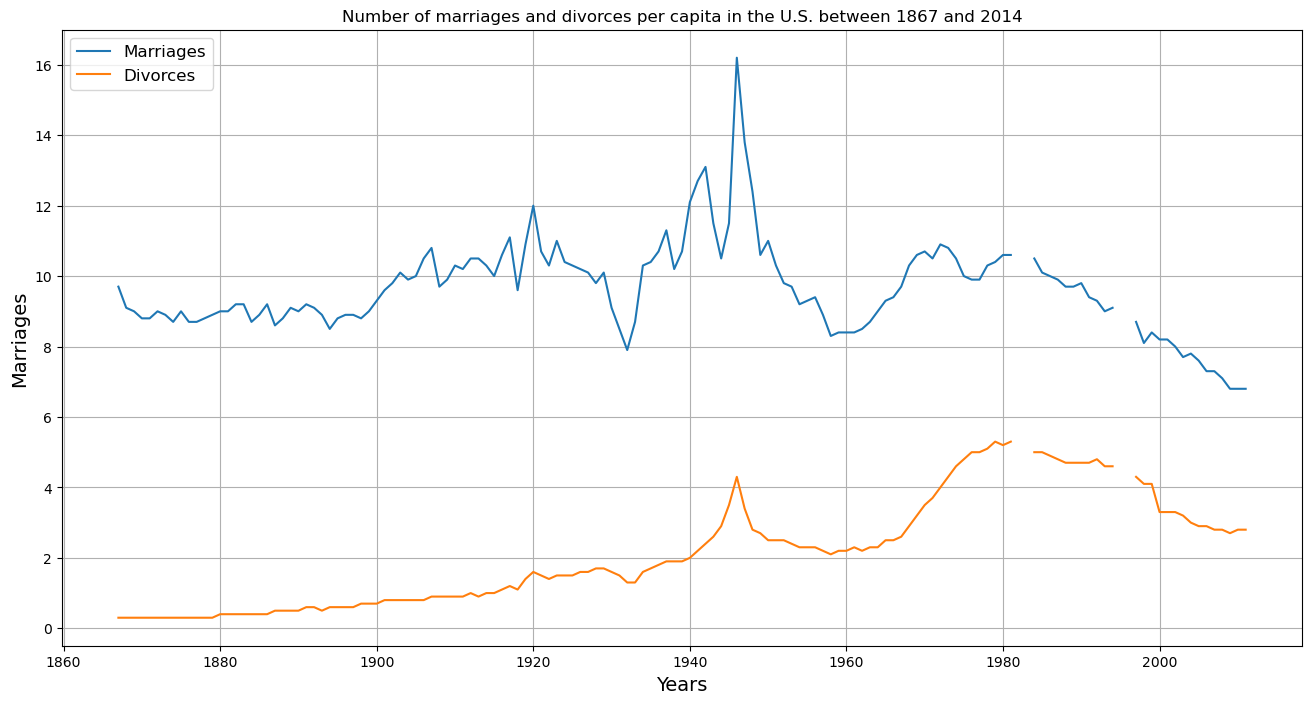

In [57]:
years = mrgdiv['Year']
marriages = mrgdiv['Marriages_per_1000']
divorces = mrgdiv['Divorces_per_1000']
mrgdiv = plt.figure(figsize=(16,8))
mrgdiv = plt.plot(years, marriages, label='Marriages')
mrgdiv = plt.plot(years, divorces, label='Divorces')
mrgdiv = plt.title("Number of marriages and divorces per capita in the U.S. between 1867 and 2014")
mrgdiv = plt.xlabel("Years",fontsize=14)
mrgdiv = plt.legend(fontsize = 12, loc = "upper left")
mrgdiv = plt.ylabel("Marriages",fontsize=14)
mrgdiv = plt.grid(True)
mrgdiv

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
info = pd.read_csv('us-marriages-divorces-1867-2014.csv')

verBar = info.loc[info.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
verBar

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


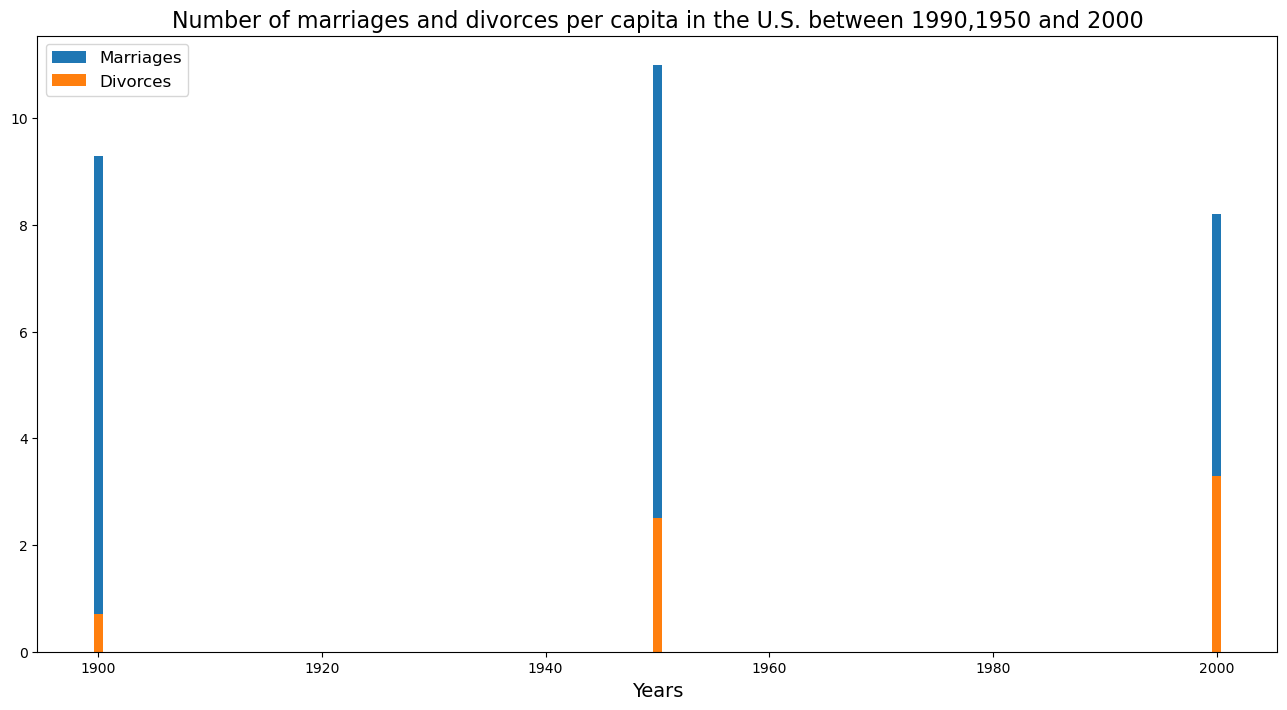

In [59]:
verBar = verBar[verBar['Year'].apply(lambda x: x in [1900, 1950, 2000])]
years = verBar['Year']
marriages = verBar['Marriages_per_1000']
divorces = verBar['Divorces_per_1000']
verBar = plt.figure(figsize= (16,8))
verBar = plt.bar(years, marriages, label ='Marriages')
verBar = plt.bar(years, divorces, label = 'Divorces')
verBar = plt.title("Number of marriages and divorces per capita in the U.S. between 1990,1950 and 2000", fontsize=16)
verBar = plt.xlabel("Years", fontsize=14)
verBar = plt.legend(fontsize = 12, loc = "upper left")
verBar

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

actors = pd.read_csv('actor_kill_counts.csv')
actors

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


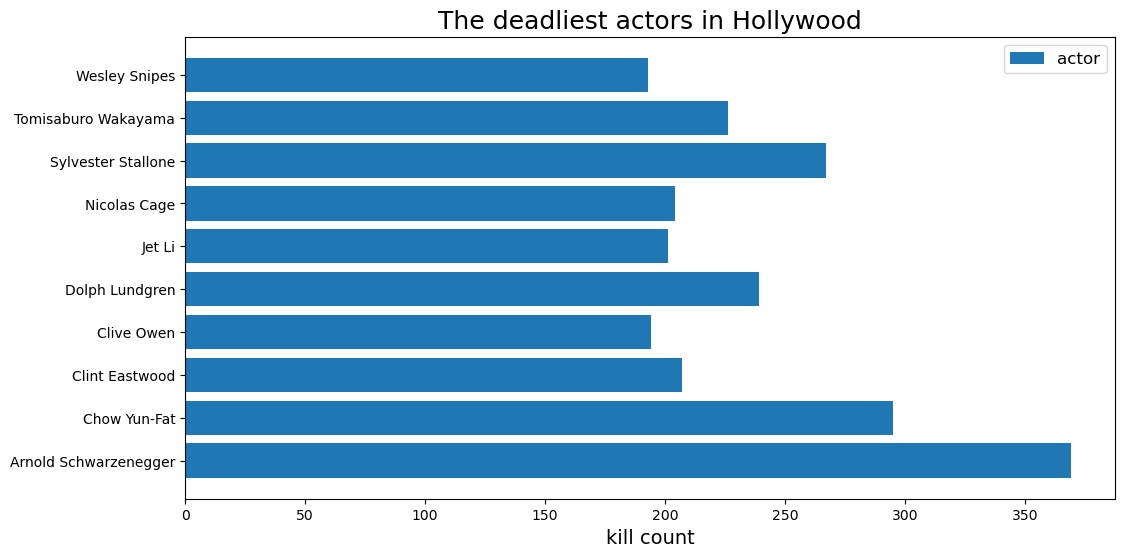

In [61]:
actorsChart = actors['Actor']
killCount = actors['Count']
actors = plt.figure(figsize=(12,6))
actors = plt.barh(actorsChart, killCount, label='actor')
actors = plt.title("The deadliest actors in Hollywood", fontsize=18)
actors = plt.xlabel("kill count", fontsize=14)
actors = plt.legend(fontsize = 12, loc = "upper right")
actors

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

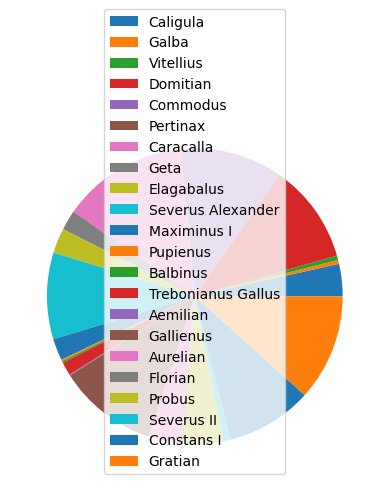

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pieData = pd.read_csv("roman-emperor-reigns.csv")
pieData = pieData[pieData["Cause_of_Death"]=="Assassinated"]
patches, texts = plt.pie(pieData.Length_of_Reign)
plt.legend(pieData.Emperor)
plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

plotData = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
plotData

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


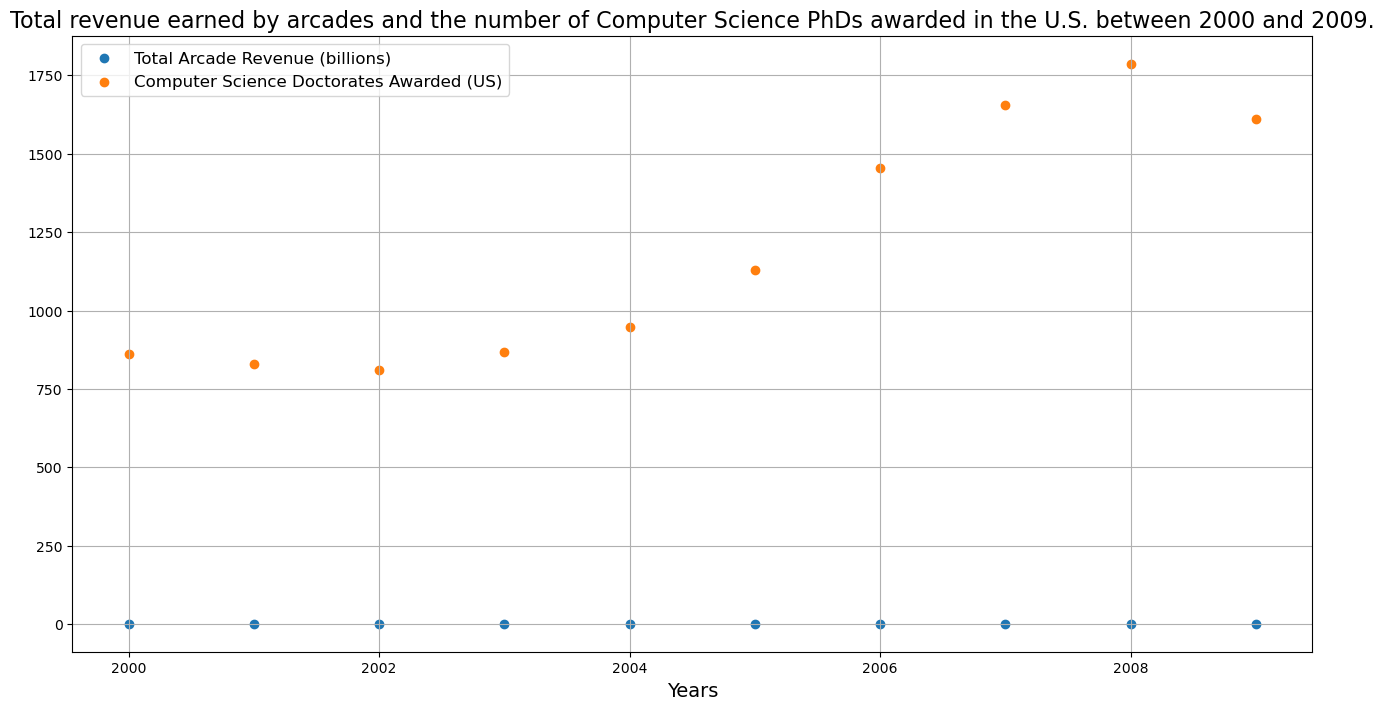

In [64]:
years = plotData['Year']
arcade = plotData['Total Arcade Revenue (billions)']
computerAward = plotData['Computer Science Doctorates Awarded (US)']
plotData = plt.figure(figsize= (16,8))
plotData = plt.scatter(years, arcade, label ='Total Arcade Revenue (billions)')
plotData = plt.scatter(years, computerAward, label = 'Computer Science Doctorates Awarded (US)')
plotData = plt.title("Total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.", fontsize=16)
plotData = plt.xlabel("Years", fontsize=14)
plotData = plt.legend(fontsize = 12, loc = "upper left")
plotData = plt.grid(True)
plotData